# PHP - Pulsating Heat Pipe
Data collection and preparation for data analysis and machine learning 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
sns.set()
import glob
#from ipynb.fs.defs.mdf import DataETL

## Data loading

### MDF Functions
1. DataETL

In [44]:
def DataETL(datapath):
    """
    DataETL loads experimental data from all experimental data files (xlsx).
    Filters data and keeps only important columns.
    Combine selected data and save it to csv file.

    useage: DataETL('datapath')
    """
    data_filenames_list = glob.glob((datapath + 'php*.csv'))
    df_frames = []
    for i in range(0, len(data_filenames_list)) :
        df_raw = pd.read_csv((data_filenames_list[i]), sep=',')
        selected_columns = ['Time (Min)', 'Tc - AVG 1&2 (oC)', 'Te - AVG 1,2,3 (oC)', 'Pressure (mm of Hg).1', 'Te - Tc (oC)', 'Q (W)',
            'Resistance (oC/W)']
        df_selected_columns = df_raw[selected_columns]
        df_frames.append(df_selected_columns)
        df = pd.concat(df_frames, axis=0, ignore_index=True)
        df_out = df.to_csv(datapath + "combined_data.csv")
    return df

## EDA

In [45]:
# loading and cleaning data
df = DataETL('data/data_php_al2o3/')

In [46]:
df.describe()

,Time (Min),Tc - AVG 1&2 (oC),"Te - AVG 1,2,3 (oC)",Pressure (mm of Hg).1,Te - Tc (oC),Q (W),Resistance (oC/W)
count,446.000000,445.000000,445.000000,445.000000,445.000000,445.0,445.000000
mean,27.873318,58.255056,72.934742,564.631461,14.679685,80.0,0.183497
std,16.534546,14.665791,16.196131,169.165011,4.890849,0.0,0.061136
min,0.000000,27.250000,27.330000,260.000000,0.080000,80.0,0.001042
25%,13.625000,47.500000,65.670000,410.000000,11.170000,80.0,0.139583
50%,27.500000,62.500000,78.670000,610.000000,15.420000,80.0,0.192708
75%,41.500000,70.500000,83.330000,685.000000,17.920000,80.0,0.223958
max,61.000000,82.000000,95.000000,869.000000,27.500000,80.0,0.343750


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time (Min)             446 non-null    float64
 1   Tc - AVG 1&2 (oC)      445 non-null    float64
 2   Te - AVG 1,2,3 (oC)    445 non-null    float64
 3   Pressure (mm of Hg).1  445 non-null    float64
 4   Te - Tc (oC)           445 non-null    float64
 5   Q (W)                  445 non-null    float64
 6   Resistance (oC/W)      445 non-null    float64
dtypes: float64(7)
memory usage: 24.5 KB


<Axes: >

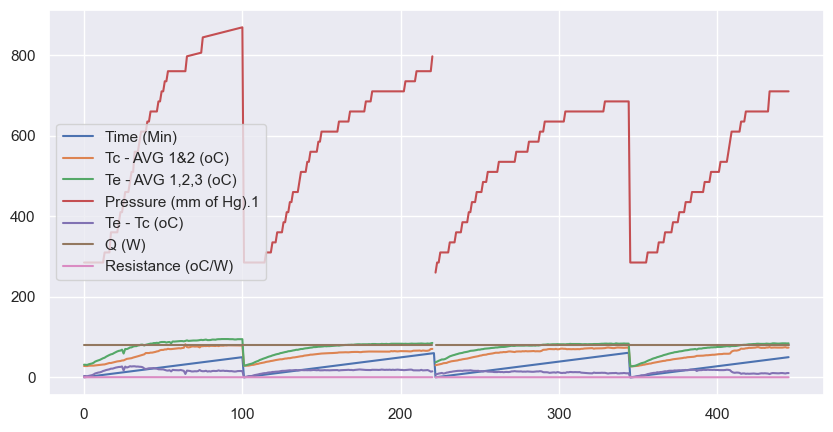

In [48]:
df.plot(figsize=(10,5))

<Axes: title={'center': 'Tc & Te'}>

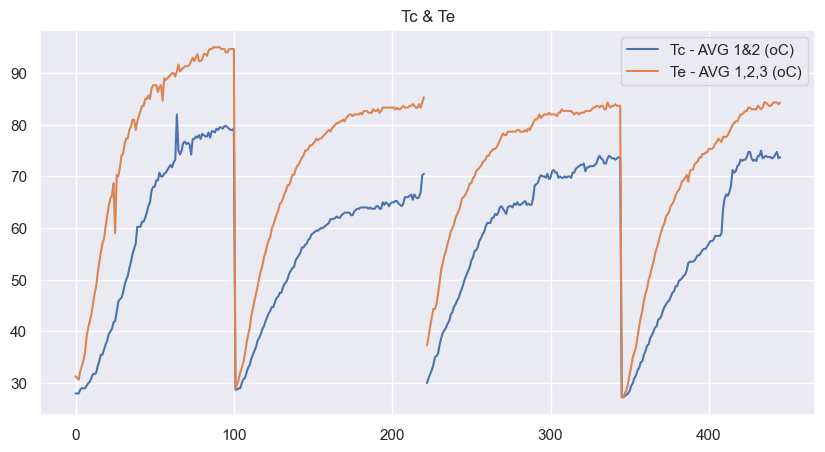

In [49]:
df[['Tc - AVG 1&2 (oC)', 'Te - AVG 1,2,3 (oC)']].plot(style='-',
                                                      figsize=(10,5),
                                                      title = 'Tc & Te')

<Axes: title={'center': 'Resistance'}>

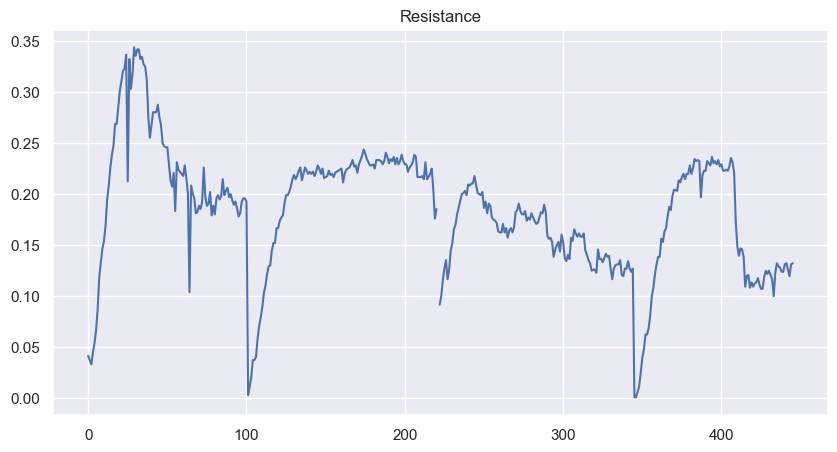

In [50]:
df['Resistance (oC/W)'].plot(style='-',
                             figsize=(10,5),
                             title =  'Resistance')

<Axes: >

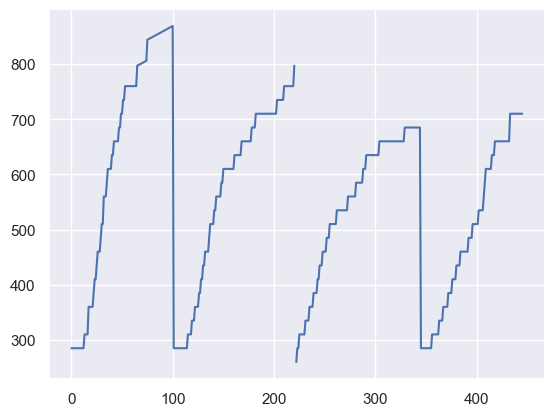

In [51]:
df['Pressure (mm of Hg).1'].plot()